In [4]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [18]:
# df_BTC = pd.read_csv('BTC-all-data.csv')
df_BTC = pd.read_csv('BTC-data-june7.csv')


In [19]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,2.244919e+07,0,1640991600000,1640995199999,BTC,USDT
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,2.077702e+07,0,1640988000000,1640991599999,BTC,USDT
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,4.482430e+07,0,1640984400000,1640987999999,BTC,USDT
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,4.588270e+07,0,1640980800000,1640984399999,BTC,USDT
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,7.803749e+07,0,1640977200000,1640980799999,BTC,USDT


In [20]:
df_BTC['open_time']

0        12/31/2021, 23:00:00
1        12/31/2021, 22:00:00
2        12/31/2021, 21:00:00
3        12/31/2021, 20:00:00
4        12/31/2021, 19:00:00
                 ...         
21269    01/01/2023, 04:00:00
21270    01/01/2023, 03:00:00
21271    01/01/2023, 02:00:00
21272    01/01/2023, 01:00:00
21273    01/01/2023, 00:00:00
Name: open_time, Length: 21274, dtype: object

In [21]:
df_BTC['datetime'] = df_BTC['open_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [22]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())

In [23]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,ignore,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,...,0,1640991600000,1640995199999,BTC,USDT,2021-12-31 23:00:00,2021,12,31,4
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,...,0,1640988000000,1640991599999,BTC,USDT,2021-12-31 22:00:00,2021,12,31,4
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,...,0,1640984400000,1640987999999,BTC,USDT,2021-12-31 21:00:00,2021,12,31,4
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,...,0,1640980800000,1640984399999,BTC,USDT,2021-12-31 20:00:00,2021,12,31,4
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,...,0,1640977200000,1640980799999,BTC,USDT,2021-12-31 19:00:00,2021,12,31,4


In [24]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
dtype: object

In [25]:
df_BTC = df_BTC.sort_values('datetime', ascending = True)

In [26]:
df_BTC = df_BTC.sort_values('datetime')
df_BTC.shape


(21274, 21)

In [27]:
sd=df_BTC.iloc[0][0]
ed=df_BTC.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 01/01/2021, 00:00:00
Ending Date 06/06/2023, 23:00:00


In [28]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
dtype: object

### Viz

In [185]:
# names = cycle(['open','high','low','close'])

# fig = px.line(df_BTC, x=df_BTC.datetime, y=[df_BTC['open'], df_BTC['high'], 
#                                           df_BTC['low'], df_BTC['close']],
#              labels={'Date': 'Date','value':'Stock value'})
# fig.update_layout(title_text='BTC over time', font_size=15, font_color='black',legend_title_text='Parameters')
# fig.for_each_trace(lambda t:  t.update(name = next(names)))
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

# fig.show()

In [186]:
# close_df = df_BTC[df_BTC.datetime > datetime.datetime(2021,5,1,0,0)][['datetime','close','year','month','day']]
# close_df = close_df.rename(columns={'datetime':'date'})
close_df = df_BTC[['datetime','close','year','month','day']]

close_df.shape



(21274, 5)

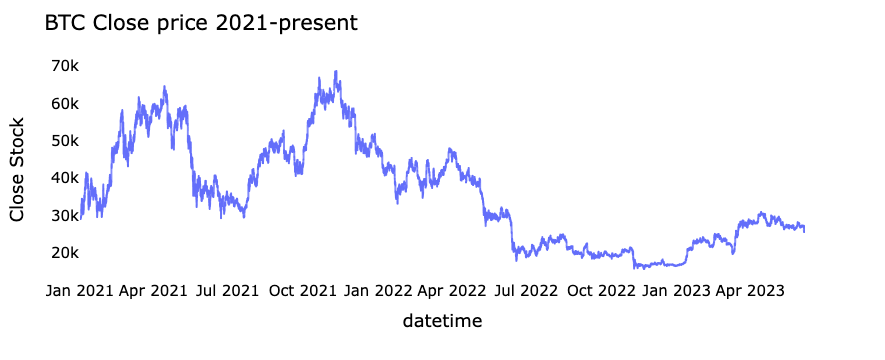

In [187]:
fig = px.line(close_df, x=close_df.datetime, y=close_df.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='BTC Close price 2021-present', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [188]:
close_df.head(5)

,datetime,close,year,month,day
8746,2021-01-01 00:00:00,28995.13,2021,1,1
8745,2021-01-01 01:00:00,29409.99,2021,1,1
8744,2021-01-01 02:00:00,29194.65,2021,1,1
8743,2021-01-01 03:00:00,29278.40,2021,1,1
8742,2021-01-01 04:00:00,29220.31,2021,1,1


In [189]:
close_df.columns

Index(['datetime', 'close', 'year', 'month', 'day'], dtype='object')

In [190]:
'''Aggregating at daily level'''

daily_df = close_df.groupby(['year', 'month', 'day']).agg({'datetime':'last','close':'last'}).reset_index()

daily_df.shape

(887, 5)

In [191]:
daily_df['date'] = daily_df['datetime'].dt.date


In [192]:
daily_df.head(2)

,year,month,day,datetime,close,date
0,2021,1,1,2021-01-01 23:00:00,29331.69,2021-01-01
1,2021,1,2,2021-01-02 23:00:00,32178.33,2021-01-02


In [193]:
daily_df = daily_df[['close','date']].sort_values('date')

daily_df.shape

(887, 2)

In [194]:
from sklearn.preprocessing import MinMaxScaler

del daily_df['date']
scaler=MinMaxScaler(feature_range=(0,1))
daily_df=scaler.fit_transform(np.array(daily_df).reshape(-1,1))
print(daily_df.shape)

(887, 1)


In [195]:
#Train/Test Split to take 2 months backtest

training_size=int(len(daily_df)*0.93)
test_size=len(daily_df)-training_size
train_data,test_data=daily_df[0:training_size,:],daily_df[training_size:len(daily_df),:1]


print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (824, 1)
test_data:  (63, 1)


In [196]:

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)



In [197]:
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (822, 1)
y_train:  (822,)
X_test:  (61, 1)
y_test (61,)


In [198]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)



X_train:  (822, 1, 1)
X_test:  (61, 1, 1)


### LSTM

In [199]:
from tensorflow.keras.callbacks import EarlyStopping

# model=Sequential()

# model.add(LSTM(20,input_shape=(None,1),activation="relu",return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(10))
# model.add(Dense(1))
# model.compile(loss="mean_squared_error",optimizer="adam")
# model.summary()

# es = EarlyStopping(patience=10, verbose=1, min_delta=0.01, monitor='loss', mode='auto', 
#                    restore_best_weights=True)


model=Sequential()

model.add(LSTM(20,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

es = EarlyStopping(patience=20, verbose=2, min_delta=0.02, monitor='loss', mode='auto', 
                   restore_best_weights=True)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [200]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=16,verbose=1,callbacks = [es])

# 

Epoch 1/100
52/52 [==============================] - 2s 7ms/step - loss: 0.1719 - val_loss: 0.0161
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0949 - val_loss: 4.8921e-04
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0448 - val_loss: 0.0073
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0136
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.0126
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0096
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0071
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0046
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch

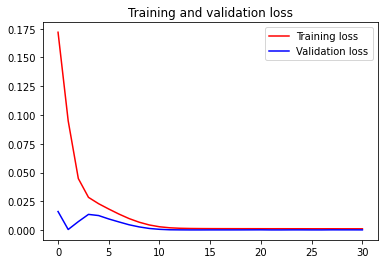

<Figure size 432x288 with 0 Axes>

In [201]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [202]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((822, 1), (61, 1))

In [203]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 


In [204]:
import math
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))

print("-------------------------------------------------------------------------------------")

print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2478.4943288390523
Train data MSE:  6142934.138087343
Train data MAE:  2057.8075076034065
-------------------------------------------------------------------------------------
Test data RMSE:  1304.5433924116162
Test data MSE:  1701833.4626848078
Test data MAE:  1180.1379802766394


In [205]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9681993736728676
Test data R2 score: -0.1852602374557193


In [206]:
# daily_df_copy =  df_BTC[df_BTC.datetime > datetime.datetime(2021,6,1,0,0)][['datetime','close']]


daily_df_copy = close_df.groupby(['year', 'month', 'day']).agg({'datetime':'last','close':'last'}).reset_index()
daily_df_copy['date'] = daily_df_copy['datetime'].dt.date
daily_df_copy = daily_df_copy[['close','date']].sort_values('date')


In [207]:
daily_df_copy.columns

Index(['close', 'date'], dtype='object')

Train predicted data:  (887, 1)
Test predicted data:  (887, 1)


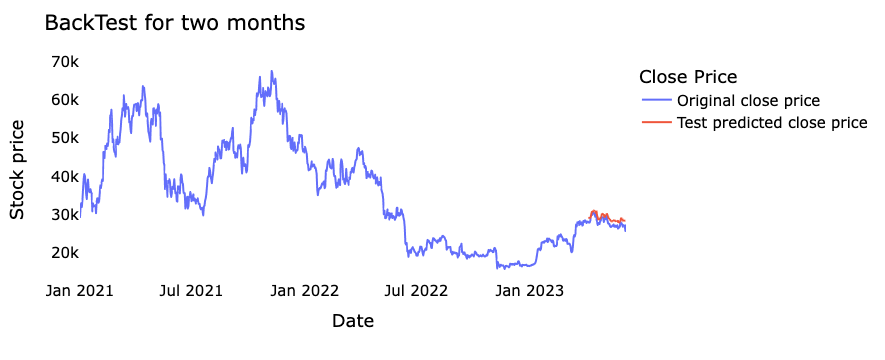

In [208]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(daily_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(daily_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(daily_df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': daily_df_copy['date'],
                       'original_close': daily_df_copy['close'],
#                       'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='BackTest for two months',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [209]:
test_data.shape

(63, 1)

In [211]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30

while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
           
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Prediction for one month: ", len(lst_output))

Prediction for one month:  30


In [212]:
daily_df_copy.tail(2)

,close,date
885,25728.20,2023-06-05
886,27230.08,2023-06-06


In [213]:
daily_df_copy['date'].iloc[-1]

datetime.date(2023, 6, 6)

In [214]:
from pandas.tseries.offsets import *
# add_dates = [(daily_df_copy['date'].iloc[-1] + pd.tseries.offsets.Hour(n = x)) for x in range(0,pred_hours+1)]
add_dates = [(daily_df_copy['date'].iloc[-1] + DateOffset(days = x)) for x in range(0,31)]

future_dates = pd.DataFrame(index = add_dates[1:])
forecast = np.array(lst_output).reshape(-1,1).tolist()

df_predict = pd.DataFrame((scaler.inverse_transform(forecast).reshape(1,-1).tolist()[0]), index = future_dates.index, columns=['Predict Close'])

daily_df_copy = daily_df_copy.set_index('date')


daily_df_copy.shape, df_predict.shape

((887, 1), (30, 1))

In [215]:
df_predict.head(2)

,Predict Close
2023-06-07,28536.727016
2023-06-08,29562.314837


In [216]:
#merging actuals + predictions

df_proj = pd.concat([daily_df_copy,df_predict],axis=0)


df_proj.shape

(917, 2)

In [217]:
df_proj.head(2)

,close,Predict Close
2021-01-01,29331.69,NaN
2021-01-02,32178.33,NaN


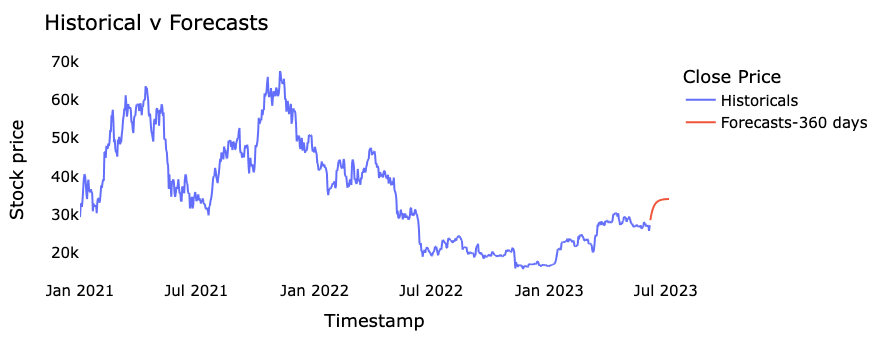

In [218]:
names = cycle(['Historicals','Forecasts-360 days'])

fig = px.line(df_proj,x=df_proj.index, y=[df_proj['close'],df_proj['Predict Close']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Historical v Forecasts',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
